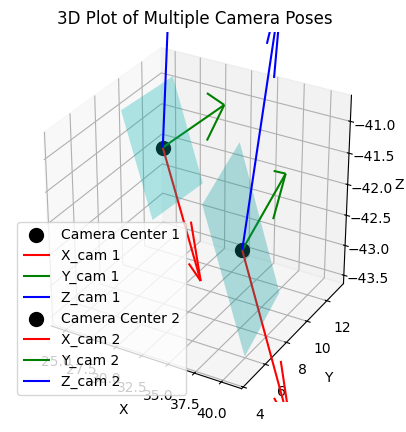

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given rotation matrix and translation vector
R = np.array([[0.788674, -0.181035, 0.587554], 
              [0.193870, 0.980138, 0.041766], 
              [-0.583445, 0.080969, 0.808106]])
t = np.array([-4.587001, -12.452844, 56.100617])

R_linear = np.array([[0.914702, 0.173612, 0.366936],
                     [-0.157876, 0.984773, -0.072778],
                     [-0.372014, 0.008955, 0.928184]])

t_linear = np.array([-11.294442, -9.430180, 48.607977])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of R and t pairs
Rs = [
    np.array([[0.914702, 0.173612, 0.366936],
              [-0.157876, 0.984773, -0.072778],
              [-0.372014, 0.008955, 0.928184]]),
    np.array([[0.788674, -0.181035, 0.587554], 
              [0.193870, 0.980138, 0.041766], 
              [-0.583445, 0.080969, 0.808106]]),
    # np.array([[0.79136691, -0.18151078, 0.58377414], 
    #           [0.19685621, 0.97970508, 0.03775697], 
    #           [-0.57877978, 0.08503995, 0.81103771]])
]

ts = [
    np.array([-11.294442, -9.430180, 48.607977]),
    np.array([-4.587001, -12.452844, 56.100617]),
    # np.array([-18.09602534, -50.59954692, 219.14641029])
]

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scale and rectangle size
scale = 5
rectangle_size = 2

# Loop through each R and t pair
for i, (R, t) in enumerate(zip(Rs, ts)):
    # Compute camera center in world coordinates
    C = -R.T @ t

    # Define camera principal axes
    X_cam = R[:, 0]  # X-axis
    Y_cam = R[:, 1]  # Y-axis
    Z_cam = R[:, 2]  # Z-axis

    # Plot camera center
    ax.scatter(*C, color='k', marker='o', s=100, label=f"Camera Center {i+1}")

    # Plot camera axes
    ax.quiver(*C, *X_cam, color='r', length=scale, normalize=True, label=f"X_cam {i+1}")
    ax.quiver(*C, *Y_cam, color='g', length=scale, normalize=True, label=f"Y_cam {i+1}")
    ax.quiver(*C, *Z_cam, color='b', length=scale, normalize=True, label=f"Z_cam {i+1}")

    # Plot the camera principal plane (rectangle)
    rect_corners = np.array([
        [1, 1, 0],
        [1, -1, 0],
        [-1, -1, 0],
        [-1, 1, 0]
    ]) * rectangle_size

    # Transform rectangle points from camera frame to world frame
    rect_world = C + (R @ rect_corners.T).T
    ax.plot_trisurf(rect_world[:, 0], rect_world[:, 1], rect_world[:, 2], color='cyan', alpha=0.3)

# Plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
plt.title("3D Plot of Multiple Camera Poses")
plt.legend()
plt.show()



C:  [ 38.76350578   6.83268703 -42.12002893]
X_x:  [ 39.55217978   6.65165203 -41.53247493]
X_y:  [ 38.95737578   7.81282503 -42.07826293]
X_z:  [ 38.18006078   6.91365603 -41.31192293]


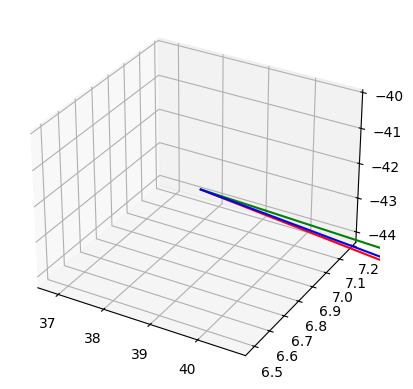

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Example data: a list of sets, each with a center point and three vectors
sets = [
    {'center': np.array([0.3, 0.3, 0.3]),
     'vectors': [np.array([0.2, 0, 0]), np.array([0, 0.2, 0]), np.array([0, 0, 0.2])]},
]

R = [[0.788674, -0.181035, 0.587554], [0.193870, 0.980138, 0.041766], [-0.583445, 0.080969, 0.808106]]
t = [-4.587001, -12.452844, 56.100617]

R = [[0.79136691, -0.18151078, 0.58377414], [0.19685621, 0.97970508, 0.03775697], [-0.57877978, 0.08503995, 0.81103771]]
t = [-18.09602534, -50.59954692, 219.14641029]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color_map = ['r', 'g', 'b']
# for i in range(len(R)):

C = -R[i].T @ t[i]
X_x = R[i].T @ np.array([1, 0, 0]).T + C
X_y = R[i].T @ np.array([0, 1, 0]).T + C
X_z = R[i].T @ np.array([0, 0, 1]).T + C

print("C: ", C)
print("X_x: ", X_x)
print("X_y: ", X_y)
print("X_z: ", X_z)

ax.quiver(C[0], C[1], C[2],
X_x, X_y, X_z,
color=color_map[i], length=1.0)

plt.savefig("3d_vectors_plot.jpg", format="jpg", dpi=300)
# # Set up the 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Loop through each set and plot the vectors and plane
# for set_data in sets:
#     center = set_data['center']
#     vectors = set_data['vectors']
    
#     # Plot vectors as arrows
#     for i, vec in enumerate(vectors):
#         color_map = {0: 'r', 1: 'b', 2: 'g'}
#         ax.quiver(center[0], center[1], center[2],
#                   vec[0], vec[1], vec[2],
#                   color=color_map[i], length=1.0)

#     # Create a plane using the first two vectors
#     # plane_points = np.array([center, center + vectors[0], center + vectors[1], center + vectors[0] + vectors[1]])
#     # poly = Poly3DCollection([plane_points], color=color, alpha=0.4)
#     # ax.add_collection3d(poly)

# # Set plot limits and labels
# ax.set_xlim([-0.8, 0.8])
# ax.set_ylim([-0.8, 0.8])
# ax.set_zlim([-0.8, 0.8])
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")

# plt.show()


In [6]:
import os

def rename_images(folder_path):
    # Get a list of all .jpg files in the specified folder
    jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    
    # Sort files to ensure a consistent order
    jpg_files.sort()
    
    # Loop over the files and rename them
    for i, filename in enumerate(jpg_files, start=1):
        # Construct the new file name
        new_name = f"Pic_{i}.jpg"
        
        # Construct full file paths
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f'Renamed: {old_path} to {new_path}')

# Replace with your folder path
folder_path = "/home/aolivepe/Computer-Vision/HW8/Dataset2"
rename_images(folder_path)


Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0019.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_1.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0020.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_2.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0021.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_3.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0023.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_4.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0024.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_5.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0025.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_6.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241108-WA0026.jpg to /home/aolivepe/Computer-Vision/HW8/Dataset2/Pic_7.jpg
Renamed: /home/aolivepe/Computer-Vision/HW8/Dataset2/IMG-20241

In [10]:
from PIL import Image
import os

def downsample_images(folder_path, new_size=(480, 640)):
    # Get a list of all .jpg files in the specified folder
    jpg_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    
    # Loop over the files and downsample each image
    for filename in jpg_files:
        # Construct full file path
        file_path = os.path.join(folder_path, filename)
        
        # Open the image, resize it, and save it
        with Image.open(file_path) as img:
            # Resize the image to the new size
            downsampled_img = img.resize(new_size, Image.LANCZOS)
            # Overwrite the original image with the downsampled version
            downsampled_img.save(file_path)
            print(f'Downsampled: {file_path}')

# Replace with your folder path
folder_path = "/home/aolivepe/Computer-Vision/HW8/Dataset_2"
downsample_images(folder_path)


Downsampled: /home/aolivepe/Computer-Vision/HW8/Dataset_2/IMG-20241108-WA0028.jpg
Downsampled: /home/aolivepe/Computer-Vision/HW8/Dataset_2/IMG-20241108-WA0034.jpg
Downsampled: /home/aolivepe/Computer-Vision/HW8/Dataset_2/IMG-20241108-WA0023.jpg
Downsampled: /home/aolivepe/Computer-Vision/HW8/Dataset_2/IMG-20241108-WA0032.jpg
Downsampled: /home/aolivepe/Computer-Vision/HW8/Dataset_2/IMG-20241108-WA0033.jpg
